## Faces Recognition using eigenfaces and SVMs

In [1]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import numpy as np

In [2]:
# Load the LFW people dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Number of samples
n_samples = lfw_people.data.shape[0]

# Number of features
n_features = lfw_people.data.shape[1]

# Number of classes
n_classes = len(lfw_people.target_names)

# Print the results
print("Number of samples:", n_samples)
print("Number of features:", n_features)
print("Number of classes:", n_classes)


Number of samples: 1288
Number of features: 1850
Number of classes: 7


Classification Report:
                    precision    recall  f1-score   support

     Ariel Sharon       1.00      0.54      0.70        13
     Colin Powell       0.66      0.98      0.79        60
  Donald Rumsfeld       0.89      0.59      0.71        27
    George W Bush       0.89      0.92      0.91       146
Gerhard Schroeder       0.95      0.76      0.84        25
      Hugo Chavez       1.00      0.47      0.64        15
       Tony Blair       0.97      0.81      0.88        36

         accuracy                           0.84       322
        macro avg       0.91      0.72      0.78       322
     weighted avg       0.87      0.84      0.84       322



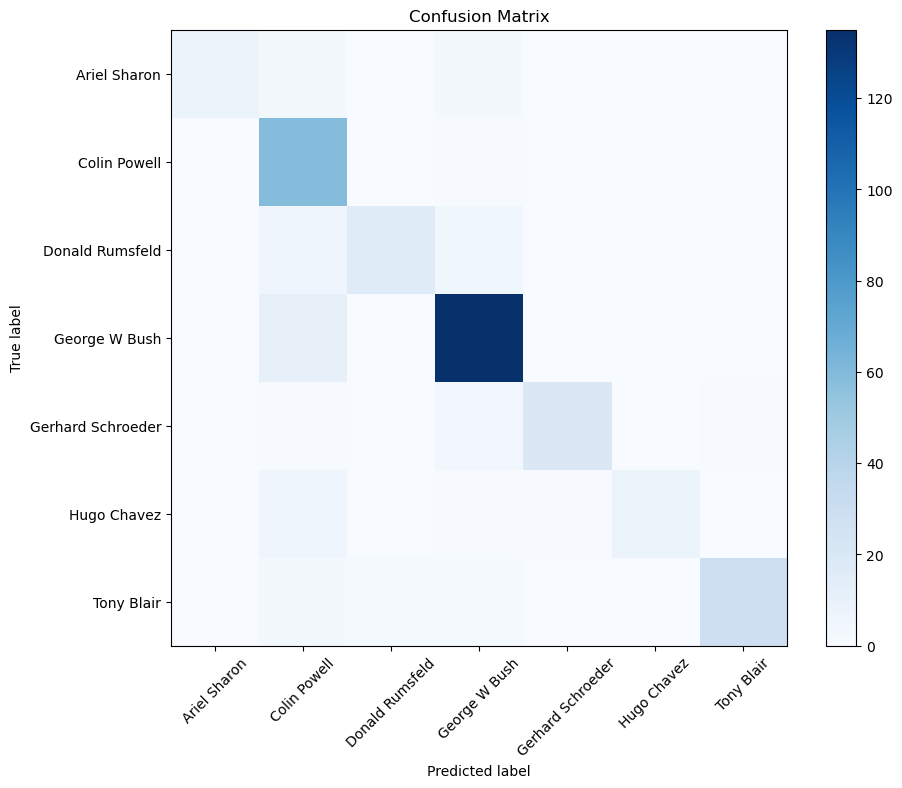

In [3]:
# 1. Split the data into test and train datasets
X = lfw_people.data
y = lfw_people.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 2. Compute PCA (eigenfaces) on the face dataset
n_components = 150  # Number of components (eigenfaces)
pca = PCA(n_components=n_components, whiten=True, random_state=42)

# Fit PCA on training data and transform both train and test data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 3. Train an SVM Model
svm_model = SVC(kernel='rbf', class_weight='balanced', C=1, gamma='scale')
svm_model.fit(X_train_pca, y_train)

# 4. Create a confusion matrix to evaluate the model
y_pred = svm_model.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=lfw_people.target_names))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(lfw_people.target_names))
plt.xticks(tick_marks, lfw_people.target_names, rotation=45)
plt.yticks(tick_marks, lfw_people.target_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()